In [1]:
import numpy as np
import matplotlib.pyplot as plt

def cross_entropy_loss_demo(y_true, y_pred, ai_name):
    """
    クロスエントロピー誤差を計算し、その意味を解説する関数
    """
    # 1. log(0)を防ぐための微小値 (epsilon)
    # これがないと、確率0のときに計算エラー(無限大)になります
    epsilon = 1e-7
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)

    # 2. ロスの計算
    # y_true は [1, 0, 0] のようなワンホットベクトルなので、
    # 実質的には「正解ラベルに対応する確率」だけを取り出して log をとっています。
    loss = -np.sum(y_true * np.log(y_pred))

    # --- 以下は表示用 ---
    print(f"--- {ai_name} の採点結果 ---")
    print(f"正解ラベル: {y_true} (イヌ, ネコ, トリ)")
    print(f"AIの予測  : {y_pred}")
    print(f"正解(イヌ)に対する自信度: {y_pred[0] * 100:.1f}%")
    print(f"★ 計算されたロス(罰): {loss:.4f}")

    # ロスの大きさに応じたコメント
    if loss < 0.5:
        print("評価: 素晴らしい！ 正解に自信を持っています。")
    elif loss < 1.0:
        print("評価: まあまあです。もう少し自信が欲しいところ。")
    else:
        print("評価: ❌ダメです！ 正解を見失っています（または自信満々に間違えています）。")
    print("\n")
    return loss

In [2]:
true_label = np.array([1, 0, 0])

# AI-A君: イヌだと80%思っている
pred_good = np.array([0.8, 0.15, 0.05])

# AI-B君: イヌだとは10%しか思っていない（ネコだと勘違いしている）
pred_bad = np.array([0.1, 0.9, 0.0])

# --- 実行 ---
loss_a = cross_entropy_loss_demo(true_label, pred_good, "AI-A君（優秀）")
loss_b = cross_entropy_loss_demo(true_label, pred_bad,  "AI-B君（ポンコツ）")


--- AI-A君（優秀） の採点結果 ---
正解ラベル: [1 0 0] (イヌ, ネコ, トリ)
AIの予測  : [0.8  0.15 0.05]
正解(イヌ)に対する自信度: 80.0%
★ 計算されたロス(罰): 0.2231
評価: 素晴らしい！ 正解に自信を持っています。


--- AI-B君（ポンコツ） の採点結果 ---
正解ラベル: [1 0 0] (イヌ, ネコ, トリ)
AIの予測  : [1.e-01 9.e-01 1.e-07]
正解(イヌ)に対する自信度: 10.0%
★ 計算されたロス(罰): 2.3026
評価: ❌ダメです！ 正解を見失っています（または自信満々に間違えています）。




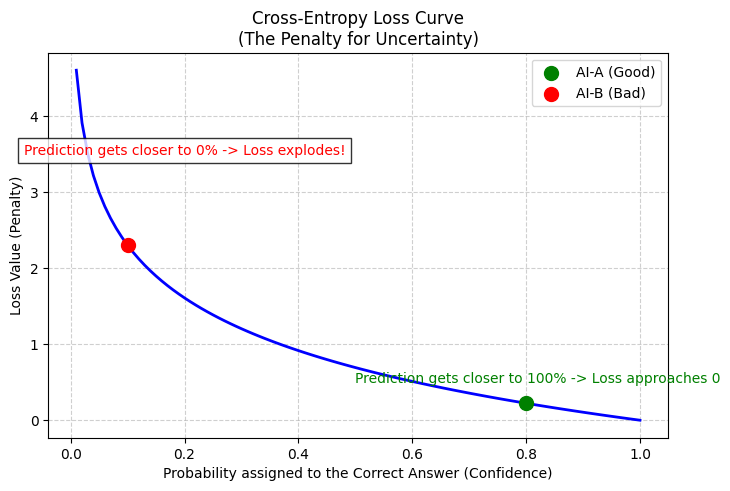

In [4]:
# 可視化コード
x = np.linspace(0.01, 1.0, 100) # 正解クラスへの予測確率 (1% 〜 100%)
y = -np.log(x)                  # クロスエントロピー誤差

plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue', linewidth=2)

# AI-AとAI-Bの位置をプロット（このデータは前の質問で計算された値を使用します）
# 注意: このコードブロックでは pred_good, loss_a, pred_bad, loss_b は定義されていませんが、
# 動作確認のためにはこれらが定義されている環境で実行する必要があります。
# 例: pred_good[0] = 0.8, loss_a = 0.2231, pred_bad[0] = 0.1, loss_b = 2.3026
loss_a = 0.2231
loss_b = 2.3026
pred_good = [0.8]
pred_bad = [0.1]

plt.scatter(pred_good[0], loss_a, color='green', s=100, label='AI-A (Good)', zorder=5)
plt.scatter(pred_bad[0], loss_b, color='red', s=100, label='AI-B (Bad)', zorder=5)

plt.title("Cross-Entropy Loss Curve\n(The Penalty for Uncertainty)")
plt.xlabel("Probability assigned to the Correct Answer (Confidence)")
plt.ylabel("Loss Value (Penalty)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# 🔴 修正点: 赤い注釈の座標を (0.5, 2.0) から (0.2, 3.5) へ移動
plt.text(0.2, 3.5, "Prediction gets closer to 0% -> Loss explodes!", color='red', fontsize=10, ha='center', bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.5, 0.5, "Prediction gets closer to 100% -> Loss approaches 0", color='green', fontsize=10)

plt.show()